# Demo for loading the custom MPI-MNIST data module

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from data.datamodules import CustomMPIMNISTDataModule

In [2]:
datapath = '/custom_datapath'
datamodule = CustomMPIMNISTDataModule(batch_size = 64, 
                                      num_workers = 8, 
                                      datapath  =datapath,
                                      exact_modeltype = 'poly',
                                      resolution = 'int',
                                      concentration = 5,
                                      noise_dev = False,
                                      model_dev = 'mono_small', 
                                      freq_selection = [50,814],
                                      flattened = True,
                                      dim_phantom = 2)

Train set...
Loaded SM for data generation.
Loaded Noise.
Loaded SM for data reconstruction.
Test set...
Loaded SM for data generation.
Loaded Noise.
Loaded SM for data reconstruction.


In [3]:
test_dataloader = datamodule.test_dataloader()
batch = next(iter(test_dataloader))
x, obs, obs_noisy = batch

print('GT shape: ', x.shape)
print('Observation shape: ', obs.shape)
print('Noisy observation shape: ', obs_noisy.shape)
print('A shape: ', datamodule.A.shape)
print('A_rec shape: ', datamodule.A_rec.shape)

GT shape:  torch.Size([64, 45, 51])
Observation shape:  torch.Size([64, 2292])
Noisy observation shape:  torch.Size([64, 2292])
A shape:  torch.Size([2292, 6375])
A_rec shape:  torch.Size([2292, 2295])


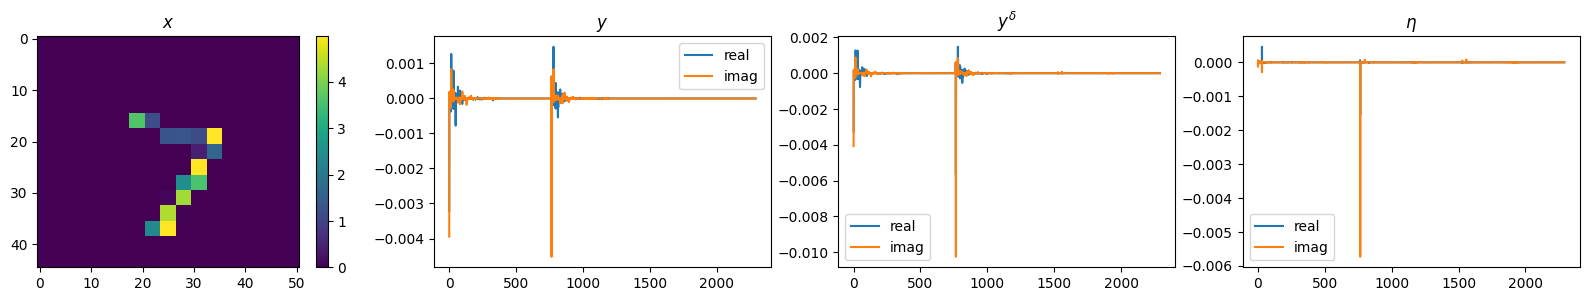

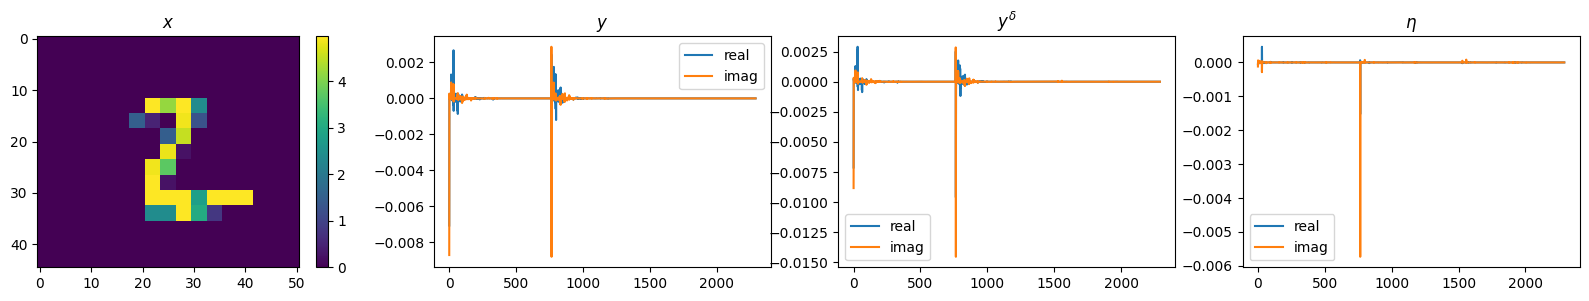

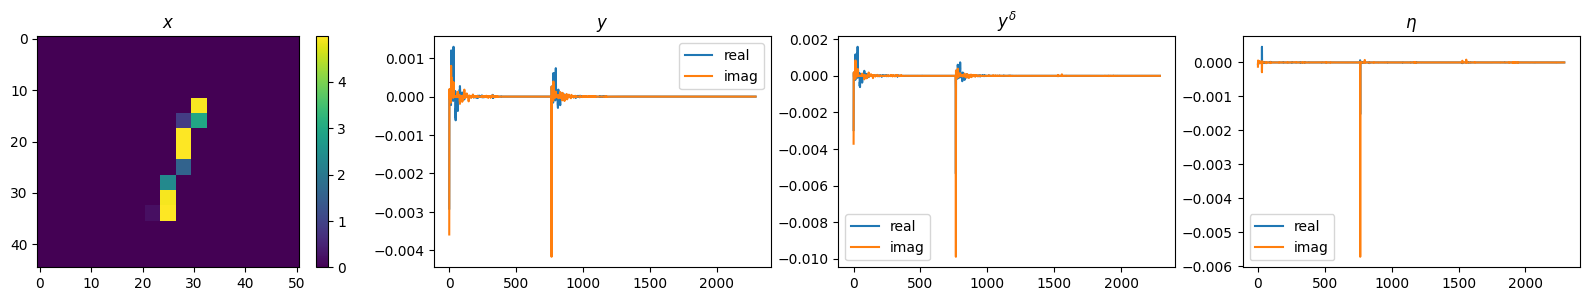

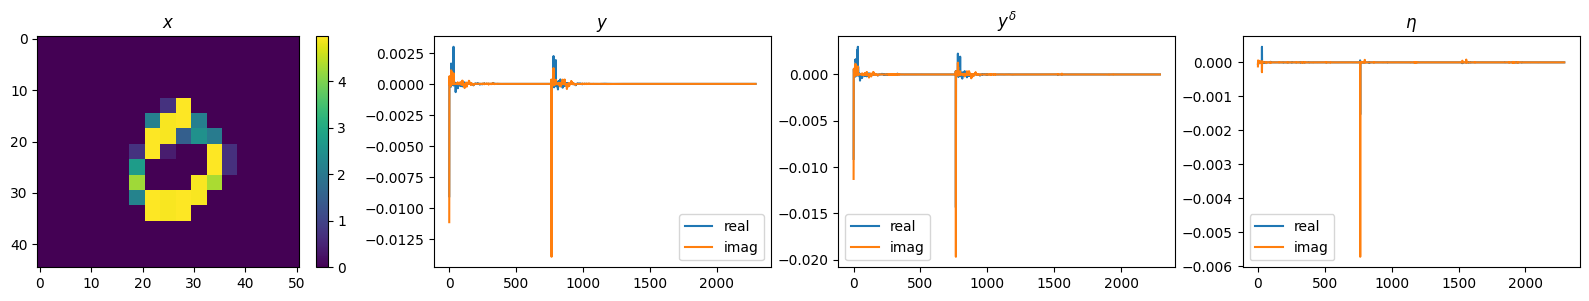

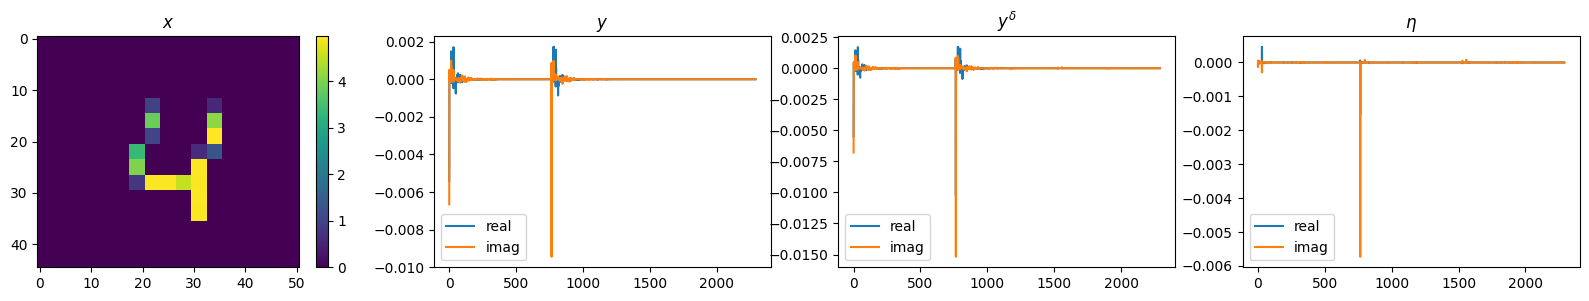

In [4]:
num_samples = 5
for i in range(num_samples):
    fig = plt.subplots(1, 4, figsize=(20,3))
    plt.subplot(1,4,1)
    plt.imshow(np.real(x[i].numpy()))
    plt.colorbar()
    plt.title(r'$x$')
    plt.subplot(1,4,2)
    plt.plot(np.real(obs[i]), label = 'real')
    plt.plot(np.imag(obs[i]), label = 'imag')
    plt.legend()
    plt.title(r'$y$')
    plt.subplot(1,4,3)
    plt.plot(np.real(obs_noisy[i]), label = 'real')
    plt.plot(np.imag(obs_noisy[i]), label = 'imag')
    plt.legend()
    plt.title(r'$y^\delta$')
    plt.subplot(1,4,4)
    plt.plot(np.real(obs_noisy[i]-obs[i]), label = 'real')
    plt.plot(np.imag(obs_noisy[i]-obs[i]), label = 'imag')
    plt.legend()
    plt.title(r'$\eta$')